# Medida de la tensión superficial. Método de Du Nouy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from tabulate import tabulate
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data
DATA_PATH = "data/"

# Figures
FIGURES_PATH = "figures/"

   temperatura (º) |   fuerza (mN) |   T (K) |   F (N) |   tension (N/m) |   errorTension (N/m) |   tension V2/3 |   errorTension V2/3
-------------------+---------------+---------+---------+-----------------+----------------------+----------------+---------------------
                79 |           5.4 |     352 |  0.0054 |       0.0440737 |          0.000816179 |    3.02711e-05 |         5.60575e-07
                71 |           5.6 |     344 |  0.0056 |       0.045706  |          0.000816179 |    3.13922e-05 |         5.60575e-07
                66 |           6   |     339 |  0.006  |       0.0489708 |          0.000816179 |    3.36345e-05 |         5.60575e-07
                61 |           6.2 |     334 |  0.0062 |       0.0506031 |          0.000816179 |    3.47557e-05 |         5.60575e-07
                55 |           6.4 |     328 |  0.0064 |       0.0522355 |          0.000816179 |    3.58768e-05 |         5.60575e-07
                49 |           6.9 |     322 |  0.0069

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


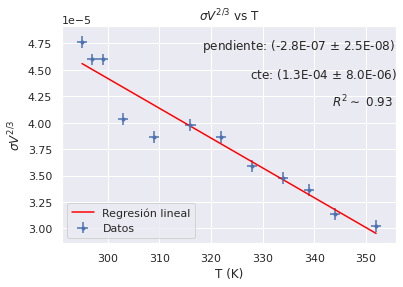

In [2]:
# Datos
T = 22 # ºC
p = 717 # mmHg
diametro = 19.5 / 1000 # m
radio = diametro / 2 # m
V_molar = 1.8 * 10**(-5) # m^3/mol

# Errores
errorT = 1 # ºC
errorF = 0.1 / 1000 # N

df = pd.read_csv(DATA_PATH + "datos_T22_P717.csv")
df["T (K)"] = df["temperatura (º)"] + 273
df["F (N)"] = df["fuerza (mN)"] / 1000

df["tension (N/m)"] = df["F (N)"] / (4 * np.pi * radio)
df["errorTension (N/m)"] = errorF / (4 * np.pi * radio)

df["tension V2/3"] = df["tension (N/m)"] * (V_molar**(2/3))
df["errorTension V2/3"] = df["errorTension (N/m)"] * (V_molar**(2/3))

print(tabulate(
    df, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

x = df["T (K)"]
y = df["tension V2/3"]
X = sm.add_constant(x, prepend=True)

ols1 = sm.OLS(y, X)
ols_result1 = ols1.fit()
print(ols_result1.summary())
print(" ")

y_pred = ols_result1.predict(X)

plt.errorbar(x, y, xerr=errorT, yerr=df["errorTension V2/3"], fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title(r"$\sigma V^{2/3}$ vs T")
plt.xlabel("T (K)")
plt.ylabel(r"$\sigma V^{2/3}$")
plt.figtext(.45, .8, f"pendiente: (%.1E $\pm$ %.1E)" % (ols_result1.params[1], ols_result1.bse[1]))
plt.figtext(.56, .7, f"cte: (%.1E $\pm$ %.1E)" % (ols_result1.params[0], ols_result1.bse[0]))
plt.figtext(.75, .6, f"$R^2 \sim$ %.2f" % ols_result1.rsquared)
plt.grid(True)
plt.legend(loc="lower left")
plt.savefig(FIGURES_PATH + "eotvos.png")
plt.show()

In [3]:
m = ols_result1.params[1]
b = ols_result1.params[0]

Tk = abs( b/m)
errorTk = (ols_result1.bse[0] / m) + abs(- b * ols_result1.bse[1] / (m**2))

print("Constante de Eotvos: ", m)
print("Constante Tk: ", Tk)
print("Error Tk: ", errorTk)

Constante de Eotvos:  -2.815419141186432e-07
Constante Tk:  456.8866656245121
Error Tk:  12.141381706355435
